# Checkpoint 2
### Due: Tuesday, 8 November, 2022 at 11:00am BST

### Total points: 100

### Read This First

Wherever you see raise NotImplementedError(), remove that line and put your code there.

Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc.

Your notebook must run correctly when executed once from start to finish. Your notebook will be graded based on how it runs, not how it looks when you submit it. To test this, go to the Kernel menu and select Restart & Run All.

Once you are happy with it, clear the output by selecting Restart & Clear Output from the Kernel menu.

You should aim for your code to not take more than around a minute per task. 

Submit through Noteable.

# Task 1 (20 points)

The first task is to find the number of local minima of the function. 
The function is defined in any number of dimensions. 

And your job is to function the number of local minimima of the function for dimensions 1, 2 3, 4, 5. Your code should return the list or array of 5 integer values.

The number of local minima for ndim = 1 should be 4. All the minimima should be within -10..10 range

We also know that the function has no minima separated by less than 0.01.

In [1]:
import numpy as np
import scipy.optimize
import scipy.linalg
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [2]:
T1_D = np.load('ch2_task1.npz')['D']
dims = [1, 2, 3, 4, 5]
import scipy.special as ssp

def blackbox_func(p):
    """
    This is is the function that you need to optimize
    DO NOT CHANGE THE CODE INSIDE THIS FUNCTION
    """
    p = np.asarray(p)
    ndim = len(p)
    pos = dims.index(ndim)
    curD = T1_D[10000 * pos:10000 * (pos + 1), :ndim]
    return -ssp.logsumexp(np.sum(-0.5 * ((p[None, :] - curD) / .3)**2, axis=1))

# The function is defined in  1,2,3,4,5 dimensions
print (blackbox_func([0]))
print (blackbox_func([0,0]))
print (blackbox_func([0,0,0]))


-1.5339371748888972
155.5936341672975
80.92394156884913


In [3]:
def find_nminima():
    """
    This function returns list of 5 integers corresponding to the number of minima per dimension 
    """
    
    # list to store the number of local minima per dimension
    dim_min = [] 
    
    # iteration to find the minima number per dimension
    for j in range(1,6):
        
        # array to store the minimum point
        min_val = np.array([np.zeros([j])])

        # iteration to try different initial guesses
        for i in range(50):
            
            # intial guess, inside the range that the minima are in 
            x0 = np.random.uniform(-10.01, 10.01,size=j)

            res = np.array([scipy.optimize.minimize(blackbox_func, x0, method='Nelder-Mead', tol = 1e-6)["x"]])   
            
            # np.around with 2 decimal places to take into acocunt that no minima is separated by less than 0.01
            min_val = np.around(np.append(res, min_val, axis = 0), 2)
    
        # -1 because the min_val array had a default row of zeros
        dim_min.append(len(np.unique(min_val, axis = 0)  ) - 1 ) 
        
        print(min_val)
     
    
    return dim_min

In [4]:
my_minima = find_nminima()
assert len(my_minima) == 5
assert (my_minima[0]) == 4


[[ 2.36]
 [-9.48]
 [ 3.94]
 [ 3.94]
 [ 3.94]
 [ 2.36]
 [ 2.36]
 [-9.48]
 [ 1.59]
 [ 2.36]
 [ 2.36]
 [ 3.94]
 [ 2.36]
 [ 2.36]
 [ 1.59]
 [ 3.94]
 [ 1.59]
 [-9.48]
 [ 3.94]
 [ 2.36]
 [-9.48]
 [ 2.36]
 [-9.48]
 [ 3.94]
 [ 2.36]
 [ 2.36]
 [-9.48]
 [ 2.36]
 [ 1.59]
 [ 2.36]
 [ 1.59]
 [ 1.59]
 [-9.48]
 [ 2.36]
 [-9.48]
 [ 2.36]
 [ 2.36]
 [ 1.59]
 [-9.48]
 [-9.48]
 [ 2.36]
 [-9.48]
 [ 1.59]
 [ 3.94]
 [ 2.36]
 [-9.48]
 [-9.48]
 [ 1.59]
 [ 1.59]
 [ 3.94]
 [ 0.  ]]
[[ 2.95  5.74]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [-5.17 -4.01]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [ 2.95  5.74]
 [-5.17 -4.01]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [-5.17 -4.01]
 [-5.17 -4.01]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [ 2.95  5.74]
 [-5.17 -4.01]
 [-5.17 -4.01]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [-5.17 -4.01]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [ 2.95  5.74]
 [ 2.95  5.74]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [-5.17 -4.01]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [-5.17 -4.01]
 [ 2.95  5.74]
 [-5.17 -4.01]


KeyboardInterrupt: 

# Task 2 (20 pts)

Generate random numbers from a probability distribution that looks like two triangles. 
The PDF f(x) is the following. Use the inverse CDF sampling method.
* f(x) = 0 when x<0
* f(x)= x/2 when 0<x<=1
* f(x)= 1-x/2 when 1<x<=2
* f(x)= 0 when 2<x<=3
* f(x)= (x-3)/2 when 3<x<4
* f(x)= (5-x)/2 when 4<x<5
* f(x)= 0 when x>=5


In [ ]:
def func_pdf(x):
    
    # PDF of the function we want to simulate
    # to see shape
    
    y = x*0
    y[x < 0] = 0.    
    y[(x>0) & (x<=1)] = 0.5*x[(x>0) & (x<=1)]
    y[(x > 1) & (x<=2)] = 1 - 0.5*x[(x > 1) & (x<=2)]
    y[(x > 2) & (x <= 3)] = 0
    y[(x > 3) & (x <= 4)] = 0.5*(x[(x > 3) & (x < 4)] - 3)
    y[(x > 4) & (x < 5)] = 0.5*(5 - x[(x > 4) & (x < 5)])
    y[x >= 5] = 0. 
    
    return y

In [ ]:
xgrid = np.linspace(-0.01, 5.01, 1000)
plt.plot(xgrid,func_pdf(xgrid))

In [ ]:
def generate_triangles(N):
    
    """ 
    This function returns a numpy array with the length N with 
    random numbers following the distribution specified
    """
    
    
    ys = np.random.uniform(size=N)
    xs = ys * 0.
    
    # inverse of the CDF calculated analytically 
    
    xs[(ys > 0) & (ys <= 0.25)] = 2*np.sqrt(ys[(ys > 0) & (ys <= 0.25)])
    
    xs[(ys > 0.25) & (ys <= 0.5)] = 2 - np.sqrt(2 - 4*ys[(ys > 0.25) & (ys <= 0.5)])
    
    xs[(ys > 0.5) & (ys <= 0.75)] = 3 + np.sqrt(4*ys[(ys > 0.5) & (ys <= 0.75)] - 2)    
    
    xs[(ys > 0.75) & (ys < 1)] = 5 - 2*np.sqrt(1-ys[(ys > 0.75) & (ys <= 1)])
    
                
    return xs


In [ ]:
# The code will be tested by this 
# the distribution of points should look like two triangles
plt.hist(generate_triangles(100000), bins=200);

# Task 3 (20 pts)

The motion of bodies in the Solar system can be described by the Kepler equation 
$$2 \pi t/T = E - e \sin(E)$$
where e is orbit eccentricity, t is the time of observation, T is the orbital period. And E is the so-called eccentric anomaly. 
If you know the eccentric anomaly E (by solving numerically the previous equation) then the position of the body in the plane of the solar system can be described by 
$$x= a  (\cos E -e) $$
$$y= b \sin E $$
where a, b are the semi-major axis and semi-minor axis respectively.

Your task is to write the function that determines the uncertainty on the position x given the time of observation (t), ecentricity (e), period (T), semi-major axis (a) and their uncertainties.
You can assume that the eccentric anomaly E will be always between -1000 and 1000.
We will verify that the errors are accurate to within 10%

In [ ]:
import scipy.optimize as opt

In [ ]:
N = 1000
t = 1
err_t = 1e-5
t_sam = np.random.normal(t, err_t, size = N)

In [ ]:
def kepler_uncert(t=None, T=None, e=None, a=None, err_t=None, err_T=None, err_e=None, err_a=None):
    
    """ 
    Returns the x coordinate of the position of a body in the plane of the solar system
    with a motion described by Kepler equation
    """
    
    
    # return the value of the uncertainty on the x position of the solar system body
    
    # number of points for sampled parameters
    N = 100000
    
    # samples of the variables taking into account the uncertainties (following normal distribution)
    t_sam = np.random.normal(t, err_t, size = N)
    T_sam = np.random.normal(T, err_T, size = N)
    e_sam = np.random.normal(e, err_e, size = N)
    a_sam = np.random.normal(a, err_a, size = N)
    
    # numpy array that will store the values of E calculated
    E_cal = np.zeros([N])
    
    
    # Kepler equation equated to zero 
    def E_root (E, t, T, e):

        return E - e*np.sin(E) - 2*np.pi*t/T

    
    for i in range(N):
        
        # roots of Kepler equation for E for each of the samples 
        # range of E [-1000, 1000]
        E = opt.brentq(E_root, -1000, 1000, args = (t_sam[i], T_sam[i], e_sam[i]))
        
        # storing roots of energy into array 
        E_cal[i] = E
    
    # position of the body in the plane of the solar system (x coordinate)
    # obtaining N values of x
    x = a_sam * ( np.cos ( E_cal) - e_sam)

    # error on the x value obtained assuming normal distribution
    return x.std()
    
    

In [ ]:
print(kepler_uncert(t=1, T=2, e=.5, a=3, err_t=1e-5, err_T=1e-4, err_e=1e-3, err_a=0.01))
# This value should be close to 0.015

print(kepler_uncert(t=3, T=4, e=.4, a=6, err_t=1e-4, err_T=1e-3, err_e=1e-2, err_a=0.02))
# This should be close to 0.106



In [ ]:
print(kepler_uncert(t=1, T=2, e=.5, a=3, err_t=1e-5, err_T=1e-4, err_e=1e-1, err_a=0.01))
# This value should be close to 0.015

print(kepler_uncert(t=3, T=4, e=.4, a=6, err_t=1e-4, err_T=1e-3, err_e=1e-2, err_a=0.02))
# This should be close to 0.106


# Task 4 (20 pts)

# Fitting a periodic model to the data. 

In the input data ch2_task4.txt. we have repeated measurements from the instrument. 
The file has 3 columns. One is the time of observation, the second one is the measurement, and the third one is the uncertainty of the measurement. 
We have reasons to believe that the measurement periodically change with time, so we want to fit the dataset provided by a periodic model 
$$M(x) = A \sin(2\pi x/T) + B \cos(2\pi x/T) $$
in order to determine the period T from the data. A,B,T are model parameters

Assuming that we know that the period should be between 0.5 and 5, determine the best period describing the data with the accuracy of better than 0.1.

Your function needs to return the tuple with the best period and bestmodel values

Hint: Use linear regression to fit the periodic models for a grid of periods. Select the period providing the best fit.

In [ ]:
T4_DATA = np.loadtxt('ch2_task4.txt')

plt.errorbar(T4_DATA[0], T4_DATA[1], T4_DATA[2], fmt='.')

def findper():
    
    """ 
    This function returns tuple with best period and bestmodel values 
    """
    
    
    # data
    X = T4_DATA[0]
    Y = T4_DATA[1]
    E = T4_DATA[2]
    
    # length of data
    N = len(X)
    
    # points taking into account accuracy of better 0.1
    points = 1000
    
    # grid of different values of T to try (within range [0.5,5] and respecting accuracy)
    grid_T = np.linspace(0.5, 5, points)
    
    # A matrix for parameters
    A = np.zeros((N, 2))
    
    # array with optimize values
    opt_val = np.zeros((points,4))
    
    
    for i in range(points):

        A[:,0] = np.sin(2*np.pi*X/grid_T[i]) / E
        A[:,1] = np.cos(2*np.pi*X/grid_T[i]) / E
        
        # optimized parameters and chisq depending on the T used
        res = scipy.linalg.lstsq(A, Y / E)
        param = res[0]
        chisq = res[1]
          
        opt_val[i,0] = grid_T[i]
        opt_val[i,1] = param[0]
        opt_val[i,2] = param[1]
        opt_val[i,3] = chisq
       
    # ind to sort out optimized parameters with respect to the minimum value of chisq
    ind = np.argsort(opt_val[:,3])
    T_chisq_sorted = opt_val[ind,3]
    
    A_sorted = opt_val[ind,1]
    best_A = A_sorted[0]
    
    B_sorted = opt_val[ind,2]
    best_B = B_sorted[0]
    
    T_sorted = opt_val[ind,0]
    best_T = T_sorted[0]
    
    best_mod = best_A*np.sin(2*np.pi*X/best_T)   +    best_B*np.cos(2*np.pi*X/best_T)
    
    
    return [best_T, best_mod]
    
        


In [ ]:
# Your code will be tested with this 
plt.errorbar(T4_DATA[0], T4_DATA[1], T4_DATA[2], fmt='.')
bestp, bestmod = findper()
print('BEST PERIOD', bestp)
plt.plot(np.sort(T4_DATA[0]), bestmod[np.argsort(T4_DATA[0])])


# Task 5 (20 pts)

You are given a dataset from the particle physics experiment. 
In that experiment the number of particles are recorded in intervals of Energy.
The dataset contains the array of those numbers and the center Energy of each bin/interval. 
We believe that the average number of particles in each bin could be described by  this model 
$$R(E) = A_1+ A_2 \exp(A_3  E) + A_4  \exp
\left( - \frac{1}{2}\frac{(E-A_5)^2}{A_6^2} \right)$$

where the first two terms are describing the background and the last term is a contribution from a decaying 
particle with the mean energy A5. This contribution creates a peak in the energy distribution. Your task is to measure A5.

In the dataset you can assume that the number of particles in each bin is described by Poisson distribution with the rate described by the equantion above. You can assume that measurement of number of particles in each bin are independent from each other.

Write the likelihood function and estimate the energy of the particle $A_5$ using maximum likelihood approach. 
Overplot your best model on top of the data and make sure it fits well. 

Determine the uncertainty of your measurement. Your function solve_task5() should return two numbers
the estimate of the energy and its uncertainty. (If you don't know how to evaluate uncertainty, you can just return np.nan instead)

In [8]:
!pip install numdifftools

In [9]:
import numdifftools

Text(0, 0.5, 'Number of particles')

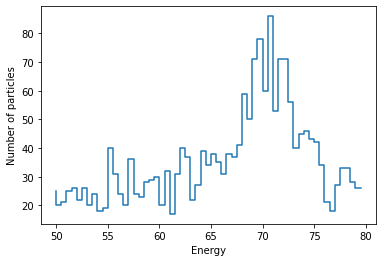

In [10]:
T5_DATA = np.loadtxt('ch2_task5.txt', dtype=[('E', np.float64), ('N', int)])
T5_DATA['E']
T5_DATA['N']
plt.plot(T5_DATA['E'], T5_DATA['N'], drawstyle='steps')
plt.xlabel('Energy')
plt.ylabel('Number of particles')

In [11]:
def solve_task5():
    """
    This function returns the best A5 paramerter and its uncertainty. 
    It also overplots the best model on top of the data
    """
    
    # data
    E_data = T5_DATA["E"]
    N_data = T5_DATA["N"]
    
    # likelihood function
    def like_fun(p, N_data, E_data):

        # parameters
        A1, A2, A3, A4, A5, A6 = p
        
        # probability function
        P = scipy.stats.poisson( A1 + A2*np.exp(A3*E_data) + A4*np.exp(-0.5* (E_data - A5)**2/A6**2) )
                                
        logp = np.log(P.pmf(N_data)).sum()
        
        # to avoid NaN results
        if not np.isfinite(logp): 
            return 1e10
        
        return -logp
        
    # calculates optimized parameters
    # initial guess by recognizing that A5 is the mean of the Gaussian and is situated ~70
    ret = scipy.optimize.minimize(like_fun, [0.1,0.1,0.1,0.1,70,0.1], args=(N_data, E_data,), method = "BFGS")
    
    # for later plotting
    def rate_fun(x, p):
        
        A1, A2, A3, A4, A5, A6 = p
        
        return A1 + A2*np.exp(A3*x) + A4*np.exp(-0.5* (x - A5)**2/A6**2)

    # plotting data and best fit model
    plt.plot(T5_DATA['E'], T5_DATA['N'], drawstyle='steps', label = "Data")
    plt.xlabel('Energy')
    plt.ylabel('Number of particles')
    plt.plot(E_data, rate_fun(E_data, ret.x), label = "Best fit model")   
    plt.legend();
    

    # calculate uncertainties on optimized parameters using numdifftools
    def myfunc(p):
        
        return like_fun(p, N_data,E_data)


    # covariance matrix
    cov = numdifftools.Hessian(myfunc)(ret.x)    
    # errors from covariance matrix
    err = np.sqrt(np.diag(scipy.linalg.inv(cov)))
    
    
    return ret.x[4], err[4] 

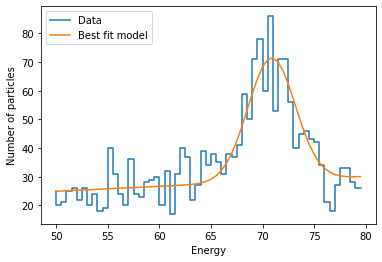

In [12]:
bestval, bessterr = solve_task5()

